**Problem Statement :** Fraud detection is an important aspect of banking and financial companies. It’s essential for both financial institutions as well as their customers to be able to identify fraud quickly and accurately. objective is to build a predictive model to determine whether a given transaction will be fraudulent or not. 

**Name :** Prashant Jain


#**Model Deployment Link  :** https://frauddetection12.herokuapp.com/

###**Content**

**Load and Import Data**

* 1. load the dataset.
* 2. Describe the structure of the data.

**Make Plots**
* 1. Plot a histogram of the transactionAmount column.

* 2. Report any structure you find and any hypotheses you have about that structure.

**Data Wrangling - Duplicate Transactions**

* 1. Programmatically identify reversed and multi-swipe transactions.
     * 1.1. Reversal transaction.
     * 1.2. Multi-swipe transaction.
* 2. Total number of transactions and total dollar amount estimated for the reversed transactions and the multi-swipe transactions.

* 3. Anything interesting about either kind of transaction.

     * 3.1. Mechant category of different kinds of duplicates.
     * 3.2. Time span between duplicates.

**Model Building.**

* 1. Build a predictive model to determine whether a given transaction will be fraudulent or not.

    * 1.1. Missing value.
    * 1.2. Feature engineering.
    * 1.3. Feature selection.
    * 1.4. Preprocess.
    * 1.5. SMOTE.
    * 1.6. Model building.
* 2. Provide an estimate of performance using an appropriate sample.

* 3. Explain the methodolog.
    * 3.1. Methodology.




###**Importing Essential Libraries**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import json
import zipfile
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn import under_sampling, over_sampling
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import (precision_score, recall_score, roc_auc_score, accuracy_score,
                             confusion_matrix, precision_recall_curve, roc_curve, brier_score_loss)

import pickle

###**Loading the  Data**

In [ ]:
# Load the zipfile

zf = zipfile.ZipFile('transactions.zip', 'r')
zipinfos = zf.infolist()
data = zf.open(zipinfos[0].filename).read().splitlines()


# Convert the json data file into a pandas dataframe

data = [json.loads(rows) for rows in data]
data = pd.DataFrame(data)

In [ ]:
# Preview the dataset

data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [ ]:
# We can see that there are multiple blank cells in the dataset, so I will firstly convert these cells into "NaN".

data = data.replace(r'^\s*$', np.nan, regex=True)
data.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000.0,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000.0,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000.0,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000.0,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


In [ ]:
#size of the dataset
data.shape   

(786363, 29)

In [ ]:
# Get all column names in the dataset

data.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'echoBuffer', 'currentBalance', 'merchantCity',
       'merchantState', 'merchantZip', 'cardPresent', 'posOnPremises',
       'recurringAuthInd', 'expirationDateKeyInMatch', 'isFraud'],
      dtype='object')

In [ ]:
# Get the name and type of each column in the dataset

data.info(verbose=True)
# This dataset has 3 columns containing boolean data, 10 columns containing floating point data and 16 columns containing object data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  object 
 1   customerId                786363 non-null  object 
 2   creditLimit               786363 non-null  float64
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                781801 non-null  object 
 8   merchantCountryCode       785639 non-null  object 
 9   posEntryMode              782309 non-null  object 
 10  posConditionCode          785954 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [ ]:
# displaying null values and unique values in the dataset
temp=pd.DataFrame({'null_values': data.isnull().sum(),'number_of_unique values' : data.nunique()})

In [ ]:
temp

,null_values,number_of_unique values
accountNumber,0,5000
customerId,0,5000
creditLimit,0,10
availableMoney,0,521916
transactionDateTime,0,776637
transactionAmount,0,66038
merchantName,0,2490
acqCountry,4562,4
merchantCountryCode,724,4
posEntryMode,4054,5


**Describe Function is useful to get information about the categorical as well as the continous variable mainly about the continous variables.**

In [ ]:
data.describe()

,creditLimit,availableMoney,transactionAmount,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,posOnPremises,recurringAuthInd
count,786363.000000,786363.000000,786363.000000,0.0,786363.000000,0.0,0.0,0.0,0.0,0.0
mean,10759.464459,6250.725369,136.985791,NaN,4508.739089,NaN,NaN,NaN,NaN,NaN
std,11636.174890,8880.783989,147.725569,NaN,6457.442068,NaN,NaN,NaN,NaN,NaN
min,250.000000,-1005.630000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5000.000000,1077.420000,33.650000,NaN,689.910000,NaN,NaN,NaN,NaN,NaN
50%,7500.000000,3184.860000,87.900000,NaN,2451.760000,NaN,NaN,NaN,NaN,NaN
75%,15000.000000,7500.000000,191.480000,NaN,5291.095000,NaN,NaN,NaN,NaN,NaN
max,50000.000000,50000.000000,2011.540000,NaN,47498.810000,NaN,NaN,NaN,NaN,NaN


###**Make Plots**

**1. Plot a histogram of the processed amounts of each transaction, the transactionAmount column.**

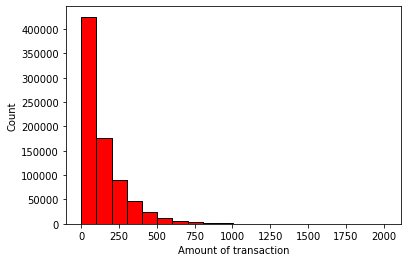

In [ ]:
# I firstly get a basic histogram 
# with transaction amount on the x-axis and count of the corresponding amount on the y-axis

plt.hist(data['transactionAmount'], color='red', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()



*   As we can find in the above histogram, there're some outliers. So I then detect and remove outliers and plot a basic histogram with remaining transaction values



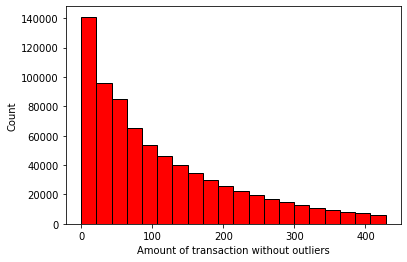

In [ ]:
# Generally speaking, transaction values should be no less than 0, so I remove values which < 0 
# According to the definition of outlier, I also remove values which are greater than Q3 + 1.5IQR
q1, q3 = np.percentile(sorted(data.transactionAmount),[25,75])
iqr = q3 - q1
lower_bound = 0
upper_bound = q3 + (1.5 * iqr) 
x = data.transactionAmount[data.transactionAmount.between(lower_bound, upper_bound)]

plt.hist(x, color='red', edgecolor='black', bins=20)
plt.xlabel('Amount of transaction without outliers', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.show()

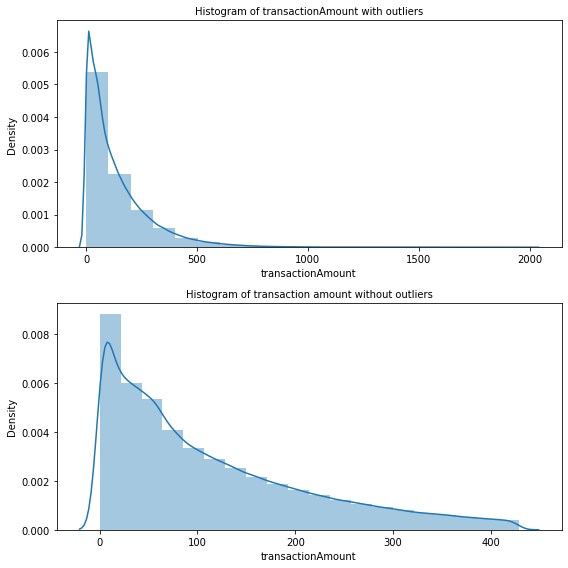

In [ ]:
# Make kernel density estimate plots of transaction amount

# A KDE plot of transactions with outliers
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
sns.distplot(data['transactionAmount'], hist=True, bins=20, kde=True, ax=ax[0])
ax[0].set_title('Histogram of transactionAmount with outliers', fontsize=10)

# A KDE plot of transactions without outliers
sns.distplot(x, hist=True, bins=20, kde=True, ax=ax[1])
ax[1].set_title('Histogram of transaction amount without outliers', fontsize=10)
plt.tight_layout()
plt.show()

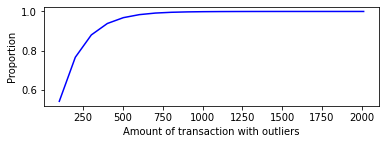

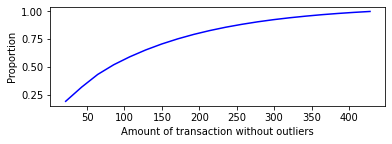

In [ ]:
# Make cumulative distribution plots of transaction amount

# A cumulative distribution plot of transactions with outliers
plt.subplot(2, 1, 1)
H,X1 = np.histogram(data['transactionAmount'], density=True, bins=20)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color='blue')
plt.xlabel('Amount of transaction with outliers', fontsize=10)
plt.ylabel('Proportion', fontsize=10)
plt.show()

# A cumulative distribution plot of transactions without outliers
plt.subplot(2, 1, 2)
H,X1 = np.histogram(x, density=True, bins=20)
dx = X1[1] - X1[0]
F1 = np.cumsum(H)*dx
plt.plot(X1[1:], F1, color='blue')
plt.xlabel('Amount of transaction without outliers', fontsize=10)
plt.ylabel('Proportion', fontsize=10)
plt.show()

**2. Report any structure you find and any hypotheses you have about that structure.**



*   From the histograms above, we can see that the distribuion of transaction amount is severely right-skewed.
*   So I hypothesize that the amount of a valid transaction is highly possible to lie between 0 to 500. And from the cumulative distribution plots, we can say that half of transactions will be less than 100.



###**Data Wrangling - Duplicate Transactions**

####**1. Programmatically identify reversed and multi-swipe transactions.**

#####**1.1 Reversed transactions**

The criteria for a reversed transaction is that a purchase should be followed by a reversal, which indicates that:



* 1. one purchase should have a corrsponding one reversal
* 2. the transactionDateTime of the purchase should be earlier than the reversal

With these 2 criteria, to filter all reversed transactions, basically what I did are:

* 1. selecting duplicated rows based on 'accountNumber', 'customerId', 'transactionAmount', 'merchantName' to find transactions of same amount within the same account from the same merchant, which are possible to be reversed transactions
* 2. creating 2 seperate datasets pur_tran and rev_tran from the duplicated dataset, one containing all purchasing records from the duplicated dataset and the other containing all reversal records from the duplicated dataset
* 3. inner joining 2 datasets by 'accountNumber', 'customerId', 'transactionAmount', 'merchantName', which means that for every record in the purchasing dataset, if there's a record in the reversal dataset which has the same values in 'accountNumber', 'customerId', 'transactionAmount', 'merchantName', this 2 records will be merged into a new dataset. In the new dataset, features with suffix_x refers to the features from the original purchasing data, features with suffix_y refers to variables from the reversal data
* 4. selecting rows which its purchasing transaction DateTime is earlier than its reversal transaction DateTime

In [ ]:
# Convert time columns to standard format

data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'], infer_datetime_format=True)
data['currentExpDate'] = pd.to_datetime(data['currentExpDate'], infer_datetime_format=True)
data['accountOpenDate'] = pd.to_datetime(data['accountOpenDate'], infer_datetime_format=True)
data['dateOfLastAddressChange'] = pd.to_datetime(data['dateOfLastAddressChange'], infer_datetime_format=True)

In [ ]:
# Select duplicated rows based on 'accountNumber', 'customerId', 'transactionAmount', 'merchantName' 

duplicated = data[data.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName'], keep=False)]

In [ ]:
# Get all records whose transaction type is purchase from the duplicated data

pur_tran = duplicated[duplicated.transactionType == 'PURCHASE']

In [ ]:
# Get all records whose transaction type is reversal from the duplicated data

rev_tran = duplicated[duplicated.transactionType == 'REVERSAL']

In [ ]:
# Inner joined the 2 datasets by 'accountNumber', 'customerId', 'transactionAmount', 'merchantName'

reversed_trans = pd.merge(pur_tran, rev_tran, on=['accountNumber', 'customerId', 'transactionAmount', 'merchantName'], how='inner')
reversed_trans.head()

,accountNumber,customerId,creditLimit_x,availableMoney_x,transactionDateTime_x,transactionAmount,merchantName,acqCountry_x,merchantCountryCode_x,posEntryMode_x,posConditionCode_x,merchantCategoryCode_x,currentExpDate_x,accountOpenDate_x,dateOfLastAddressChange_x,cardCVV_x,enteredCVV_x,cardLast4Digits_x,transactionType_x,echoBuffer_x,currentBalance_x,merchantCity_x,merchantState_x,merchantZip_x,cardPresent_x,posOnPremises_x,recurringAuthInd_x,expirationDateKeyInMatch_x,isFraud_x,creditLimit_y,availableMoney_y,transactionDateTime_y,acqCountry_y,merchantCountryCode_y,posEntryMode_y,posConditionCode_y,merchantCategoryCode_y,currentExpDate_y,accountOpenDate_y,dateOfLastAddressChange_y,cardCVV_y,enteredCVV_y,cardLast4Digits_y,transactionType_y,echoBuffer_y,currentBalance_y,merchantCity_y,merchantState_y,merchantZip_y,cardPresent_y,posOnPremises_y,recurringAuthInd_y,expirationDateKeyInMatch_y,isFraud_y
0,574788567,574788567,2500.0,2416.11,2016-05-24 01:35:33,215.13,Convenient Tire,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,PURCHASE,NaN,83.89,NaN,NaN,NaN,True,NaN,NaN,False,False,2500.0,2200.98,2016-05-24 01:38:03,US,US,09,01,auto,2021-10-01,2015-10-13,2015-10-13,206,206,8522,REVERSAL,NaN,299.02,NaN,NaN,NaN,True,NaN,NaN,False,False
1,924729945,924729945,50000.0,50000.00,2016-10-04 04:20:04,168.57,discount.com,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False,50000.0,49831.43,2016-10-19 14:01:45,US,US,05,01,online_retail,2024-11-01,2014-07-25,2014-07-25,205,265,9459,REVERSAL,NaN,168.57,NaN,NaN,NaN,False,NaN,NaN,False,False
2,984504651,984504651,50000.0,49138.85,2016-01-06 04:08:06,83.64,1st Sandwitch Bar #801388,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,861.15,NaN,NaN,NaN,True,NaN,NaN,False,False,50000.0,38090.70,2016-02-04 00:14:42,US,US,09,01,food,2025-11-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,11909.30,NaN,NaN,NaN,True,NaN,NaN,False,False
3,984504651,984504651,50000.0,46818.15,2016-01-16 09:52:30,450.74,Planet Fitness #849960,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,3181.85,NaN,NaN,NaN,False,NaN,NaN,False,False,50000.0,46367.41,2016-01-16 09:53:15,US,US,05,01,health,2028-08-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,3632.59,NaN,NaN,NaN,False,NaN,NaN,False,False
4,984504651,984504651,50000.0,46341.05,2016-01-17 08:13:08,81.73,AMC #724446,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,3658.95,NaN,NaN,NaN,True,NaN,NaN,False,False,50000.0,41909.30,2016-01-25 20:39:15,US,US,09,01,entertainment,2031-12-01,2015-07-27,2015-07-27,640,640,8332,REVERSAL,NaN,8090.70,NaN,NaN,NaN,True,NaN,NaN,False,False


In [ ]:
# Select rows which its purchasing transaction DateTime is earlier than its reversal transaction DateTime.

reversed_trans = reversed_trans[reversed_trans.transactionDateTime_x < reversed_trans.transactionDateTime_y]

In [ ]:
#The final reversal transaction data

reversed_trans[['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionDateTime_x', 'transactionDateTime_y',
                'transactionType_x', 'transactionType_y']].head()

,accountNumber,customerId,transactionAmount,merchantName,transactionDateTime_x,transactionDateTime_y,transactionType_x,transactionType_y
0,574788567,574788567,215.13,Convenient Tire,2016-05-24 01:35:33,2016-05-24 01:38:03,PURCHASE,REVERSAL
1,924729945,924729945,168.57,discount.com,2016-10-04 04:20:04,2016-10-19 14:01:45,PURCHASE,REVERSAL
2,984504651,984504651,83.64,1st Sandwitch Bar #801388,2016-01-06 04:08:06,2016-02-04 00:14:42,PURCHASE,REVERSAL
3,984504651,984504651,450.74,Planet Fitness #849960,2016-01-16 09:52:30,2016-01-16 09:53:15,PURCHASE,REVERSAL
4,984504651,984504651,81.73,AMC #724446,2016-01-17 08:13:08,2016-01-25 20:39:15,PURCHASE,REVERSAL


####**1.2 Multi-swipe transactions**

The criteria for a multi_swipe transaction is that a vendor accidentally charges a customer's card multiple times within a short time span, which indicates that:

* 1. there should be multiple purchases with the same transaction amount
* 2. the transaction DateTime of different purchases should be within a short time span. I assume they are within 1 hour

With these 2 criteria, to filter all reversed transactions, I will:

* 1. select duplicated rows based on 'accountNumber', 'customerId', 'transactionAmount', 'merchantName' and 'transactionType' to find transactions of same amount within the same account from the same merchant, which are possible to be multi-swipe transaction
* 2. select records whose transaction type is purchasing
* 3. group purchasing dataset and apply a function to calculate the time span between transactions with the same amount from the merchant
* 4. select rows which transaction time span is less than 1 hour

In [ ]:
# Select duplicated rows based on 'accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionType'

duplicated = data[data.duplicated(['accountNumber', 'customerId', 'transactionAmount', 'merchantName', 'transactionType'], 
                                  keep=False)]

In [ ]:
# Select purchasing transactions and sort the purchasing data by transactionDateTime

purchase = duplicated[duplicated.transactionType == 'PURCHASE']
purchase.sort_values(['accountNumber', 'customerId', 'merchantName', 'transactionDateTime'])
purchase.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
2,737265056,737265056,5000.0,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000.0,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,01,mobileapps,2025-08-01,2015-03-14,2015-03-14,486,486,767,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
11,830329091,830329091,5000.0,5000.00,2016-12-07 16:34:04,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False,False
12,830329091,830329091,5000.0,4959.25,2016-12-14 10:00:35,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,40.75,NaN,NaN,NaN,False,NaN,NaN,False,False
13,830329091,830329091,5000.0,4918.50,2016-12-20 18:38:23,40.75,GreenCook,US,US,09,01,food_delivery,2024-08-01,2015-08-06,2015-08-06,885,885,3143,PURCHASE,NaN,81.50,NaN,NaN,NaN,False,NaN,NaN,False,False


In [ ]:
# Group the purchasing dataset and apply a function to calculate the time span

def span(df):
    df['time_span'] = df["transactionDateTime"].diff(1).dt.total_seconds() / 3600
    return df

multi_purchase = purchase.groupby(['accountNumber', 'customerId', 'merchantName', 'transactionAmount']).apply(span)

In [ ]:
# Select rows which transaction time span is less than 1 hour

multi_swipe = multi_purchase[multi_purchase.time_span < 1]
multi_swipe.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud,time_span
263,984504651,984504651,50000.0,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,23319.01,NaN,NaN,NaN,True,NaN,NaN,False,False,0.004444
264,984504651,984504651,50000.0,26562.47,2016-03-12 06:36:41,118.52,AMC #706324,US,US,02,01,entertainment,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,23437.53,NaN,NaN,NaN,True,NaN,NaN,False,False,0.036667
281,984504651,984504651,50000.0,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,01,health,2024-10-01,2015-07-27,2015-07-27,640,640,8332,PURCHASE,NaN,25683.88,NaN,NaN,NaN,True,NaN,NaN,False,False,0.012222
339,984504651,984504651,50000.0,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,08,health,2030-02-01,2015-07-27,2016-03-26,640,640,8332,PURCHASE,NaN,33496.51,NaN,NaN,NaN,False,NaN,NaN,False,False,0.010556
413,984504651,984504651,50000.0,7302.32,2016-05-07 07:32:54,23.82,Golds Gym #846582,US,US,09,01,health,2030-12-01,2015-07-27,2016-05-05,640,640,8332,PURCHASE,NaN,42697.68,NaN,NaN,NaN,True,NaN,NaN,False,False,0.047778



**2. Total number of transactions and total dollar amount estimated for the reversed transactions and the multi-swipe transactions.**

In [ ]:
print(f"The total number of transactions for reversed transactions is {reversed_trans.shape[0]}.")
print(f"The total dollar estimated  for reversed transactions is {reversed_trans.transactionAmount.sum()}.")
print(f"The total number of multi-swipe transactions is {multi_swipe.shape[0]}.")
print(f"The total dollar estimated  for reversed transactions is {multi_swipe.transactionAmount.sum()}.")

The total number of transactions for reversed transactions is 17999.
The total dollar estimated  for reversed transactions is 2701311.87.
The total number of multi-swipe transactions is 7450.
The total dollar estimated  for reversed transactions is 1103132.25.



####**3. Anything interesting about either kind of transaction.**

**3.1. Mechant category of different kinds of duplicates**

I want to know whether the type of merchant will have impact on the likelihood of duplicate transactions. So I will build a table for proportions of reversed transaction and multi-swipe in different types of merchant and see if there're some interesting patterns.

In [ ]:
# Get proportion of different types of merchant

all_pro = data.merchantCategoryCode.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('overall_proportion')
rev_pro = reversed_trans.merchantCategoryCode_x.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('reversed_proportion')
mul_pro = multi_swipe.merchantCategoryCode.value_counts(normalize=True).rename_axis('MerchantCategory').to_frame('multi_proportion')

In [ ]:
# Compare proportion of different types of merchant# Get proportion of 

mer_pro = all_pro.merge(rev_pro, how='left', on=['MerchantCategory']).merge(mul_pro, how='left', on=['MerchantCategory'])
mer_pro

,overall_proportion,reversed_proportion,multi_proportion
MerchantCategory,,,
online_retail,0.257077,0.275460,0.275705
fastfood,0.142603,0.155620,0.160000
entertainment,0.101859,0.108950,0.115302
food,0.095999,0.104784,0.103221
online_gifts,0.084233,0.095116,0.089799
rideshare,0.065028,0.067782,0.068456
hotels,0.043360,0.049725,0.045235
fuel,0.030406,NaN,NaN
subscriptions,0.029123,0.030502,0.031141


* 1. From the above dataset we can see that,generally speaking, merchants who account for a higher proportion of overall transactions are also more likely to have reversed transactions and multi-swipe transactions. This also means that most of merchant don't have a much higher or lower possibility to give reversed transactions or multi-swipe transactions.
* 2. However, for fuel merchants, they account for more than 3% in the overall transaction data but don't have any records in the reversed transactions and multi-swipe transactions data. This means that fuel merchants have very lower possibility to give reversed transactions or multi-swipe transactions to their customers.

**3.2. Time span between duplicates** 

In [ ]:

# Add time span of reversed transactions

reversed_trans['time_span'] = ((reversed_trans.transactionDateTime_y - 
                               reversed_trans.transactionDateTime_x) / np.timedelta64(1, 'D')).astype(int)

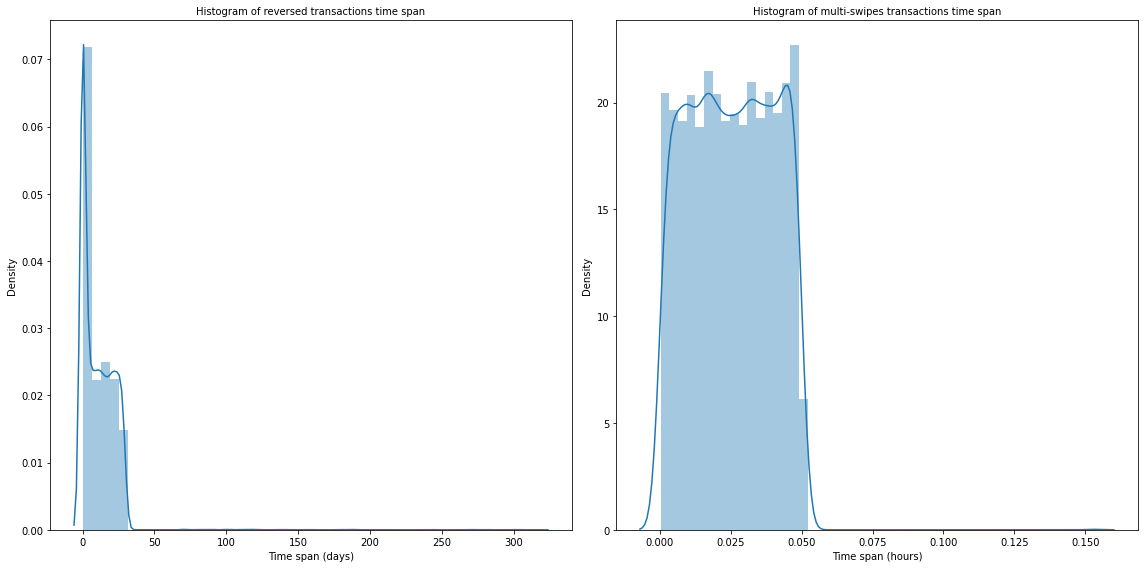

In [ ]:
# Make distribution plots to visualize their time span and compare

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.distplot(reversed_trans.time_span, hist=True, kde=True, ax=ax[0])
ax[0].set_xlabel('Time span (days)')
ax[0].set_title('Histogram of reversed transactions time span', fontsize=10)

# A KDE plot of transactions without outliers
sns.distplot(multi_swipe.time_span, hist=True, kde=True, ax=ax[1])
ax[1].set_xlabel('Time span (hours)')
ax[1].set_title('Histogram of multi-swipes transactions time span', fontsize=10)
plt.tight_layout()
plt.show()


* 1. From the above graphs, we can find that there're often days between multiple reversed transactions. And almost all of them happen within 50 days.
* 2. While multi-swipe transactions often happen within few seconds. Almost all of them happen within 3 minutes.

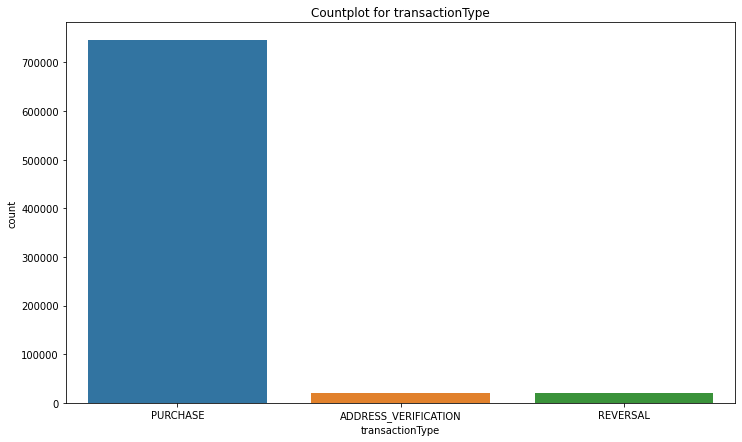

In [ ]:
# Creating countplot for sub_category
fig = plt.figure(figsize=(12,7))
plt.title('Countplot for transactionType')
plt.xlabel('transactionType')
plt.ylabel('Count')
sns.countplot(x='transactionType',data=data)


#**Model Building**

###**1. Build a predictive model to determine whether a given transaction will be fraudulent or not.**

In [ ]:
# Make a copy of the original dataset for model building
df = data.copy()

**1.1. Applying Missing value Treatment**

In [ ]:
# Drop columns with no records
df = df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'
], axis=1)

In [ ]:
# displaying null values in the dataset
df.isnull().sum()

accountNumber                  0
customerId                     0
creditLimit                    0
availableMoney                 0
transactionDateTime            0
transactionAmount              0
merchantName                   0
acqCountry                  4562
merchantCountryCode          724
posEntryMode                4054
posConditionCode             409
merchantCategoryCode           0
currentExpDate                 0
accountOpenDate                0
dateOfLastAddressChange        0
cardCVV                        0
enteredCVV                     0
cardLast4Digits                0
transactionType              698
currentBalance                 0
cardPresent                    0
expirationDateKeyInMatch       0
isFraud                        0
dtype: int64

In [ ]:

# Inspect missing values columns

print("Frequency of values in column acqCountry: \n",df.acqCountry.value_counts())
print("Frequency of values in column merchantCountryCode: \n",df.merchantCountryCode.value_counts())
print("Frequency of values in column posEntryMode: \n",df.posEntryMode.value_counts())
print("Frequency of values in column posConditionCode: \n",df.posConditionCode.value_counts())
print("Frequency of values in column transactionType: \n",df.transactionType.value_counts())

Frequency of values in column acqCountry: 
 US     774709
MEX      3130
CAN      2424
PR       1538
Name: acqCountry, dtype: int64
Frequency of values in column merchantCountryCode: 
 US     778511
MEX      3143
CAN      2426
PR       1559
Name: merchantCountryCode, dtype: int64
Frequency of values in column posEntryMode: 
 05    315035
09    236481
02    195934
90     19576
80     15283
Name: posEntryMode, dtype: int64
Frequency of values in column posConditionCode: 
 01    628787
08    149634
99      7533
Name: posConditionCode, dtype: int64
Frequency of values in column transactionType: 
 PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
Name: transactionType, dtype: int64


In [ ]:
#handling missing data (Replacing missing data with the mode value)  
imputer= SimpleImputer(missing_values=np.NAN,strategy='most_frequent',fill_value=None, verbose=1, copy=True)
imputer= imputer.fit(df[['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType']])
df[['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType']]=imputer.transform(df[['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType']])

**1.2. Feature engineering**

The original dataset contains a number of features but some of them don't tell much valuable information. So I will convert to a new feature, which I believe will be more related to fraud detection.


**1.2.1. rightCVV**

The original dataset has 2 columns, "cardCVV" and "enteredCVV". I will convert these 2 columns to be a dummy feature: "rightCVV". If cardCVV = enteredCVV, rightCVV = 1, otherwise, rightCVV = 0. The reason I do this is that typically, the card's verification value adds extra security to transaction. So if the entered CVV is incorrect, it's highly possible that this transaction would be fraud.

In [ ]:
# Convert cardCVV and enteredCVV to rightCVV

df['rightCVV'] = (df.cardCVV == df.enteredCVV).astype(int)
df = df.drop(['cardCVV', 'enteredCVV'], axis=1)

**1.2.2. sameCountry**

The original dataset has 2 columns, "acqCountry" and "merchantCountryCode". I will convert these 2 columns to be a dummy feature: "sameCountry". If acqCountry = merchantCountryCode, sameCountry = 1, otherwise, sameCountry = 0. The reason I do this is that most of the time, people will use their cards in the country they acquired cards. If they use their cards in some other countries, it's possible that this transaction would be fraud.

In [ ]:
# Convert acqCountry and merchantCountryCode to sameCountry

df['sameCountry'] = (df.acqCountry == df.merchantCountryCode).astype(int)
df = df.drop(['acqCountry', 'merchantCountryCode'], axis=1)


**1.2.3. Whether first time purchasing merchant**

The original dataset has a feature "merchantName". Actually just the name can't tell us something valuable. So I will convert this column to be a dummy feature: "firPurchase". If it's the customer's first time purchasing in this merchant, firPurchase = 1, otherwise, firPurchase = 0. The reason I do this is that most of the time, fraud transactions happen in a merchant where the customer hasn't used before.

In [ ]:
# Convert merchantName to firPurchase

# Decide whether it's the first record of a certain customer in a certain customer
df = df.sort_values(['customerId', 'merchantName', 'transactionDateTime'])
df['firPurchase'] = df.groupby(['customerId', 'merchantName']).cumcount()
df['firPurchase'][df['firPurchase'] == 0] = 1
df['firPurchase'][df['firPurchase'] > 0] = 0

**1.2.4. Datetime data** 

The original dataset has multiple date transactionDateTime, currentExpDate, accountOpenDate and dateOfLastAddressChange. I want to convert these datetime features into time interval features, which are more informative.

* 1. For currentExpDate, I will change it to expTime, which indicates the time between the transaction date and the expiration date.
* 2. For accountOpenDate, I will change it to openTime, which indicates the time between the account open date and the transaction date.
* 3. For dateOfLastAddressChange, I will change it to changeAddTime, which indicates the time between the last of address change date and the transaction date.

In [ ]:
# Convert datetime to time span (days)
df['expTime'] = ((df.currentExpDate - df.transactionDateTime) / np.timedelta64(1, 'D'))
df['openTime'] = ((df.transactionDateTime - df.accountOpenDate) / np.timedelta64(1, 'D'))
df['changeAddTime'] = ((df.transactionDateTime - df.dateOfLastAddressChange) / np.timedelta64(1, 'D'))

**1.2.5. Duplicate transactions (reversed transaction and multi-swipes)**

I will add reversed transaction and multi-swipes as attributes to the dataset because that pratically speaking, duplicate transactions may have higher possibilities to be fraud. So I will add dummy variables to identify whether this transaction is reversed transaction and whetehr this transaction is multi-swipes transaction.

In [ ]:
# Subset reversed transactions in the dataset

lst_re = ['accountNumber', 'transactionAmount', 'merchantName', 'transactionDateTime_y', 'transactionType_y']
lst_or = ['accountNumber', 'transactionAmount', 'merchantName', 'transactionDateTime', 'transactionType']

df.loc[df.set_index(lst_or).index.isin(reversed_trans.set_index(lst_re).index) == True, 'reversed'] = 1

In [ ]:
# if not reversed transaction, reversed = 0

df.reversed = df.reversed.fillna(0)

In [ ]:
# Check the number of reversed transactions and other transactions

df.reversed.value_counts()

0.0    768604
1.0     17759
Name: reversed, dtype: int64

In [ ]:
# Subset multi-swipe transactions in the dataset

lst_mul = ['accountNumber', 'transactionAmount', 'merchantName', 'transactionDateTime', 'transactionType']
lst_or = ['accountNumber', 'transactionAmount', 'merchantName', 'transactionDateTime', 'transactionType']

df.loc[df.set_index(lst_or).index.isin(multi_swipe.set_index(lst_mul).index) == True, 'multi'] = 1

In [ ]:
# if not multi-swipe transaction, multi = 0

df.multi = df.multi.fillna(0)

In [ ]:
# Check the number of multi-swipe transactions

df.multi.value_counts()

0.0    778913
1.0      7450
Name: multi, dtype: int64


####**1.3. Feature selection**

* I will firstly drop some columns which will not be useful for model building.

1. accountNumber, customerId and cardLast4Digits, which are just identifiers for each card
2. As I explained before, I will drop merchantName and datetime variables including: transactionDateTime, currentExpDate, accountOpenDate and dateOfLastAddressChange
3. availableMoney, which is highly related to creditLimit and currentBalance. availableMoney = creditLimit - currentBalance
* Check correlation matrix to see if remaining features are correlated

In [ ]:
df = df.drop(['accountNumber', 'customerId', 'cardLast4Digits', 'merchantName', 'transactionDateTime',
             'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange', 'availableMoney'], axis=1)

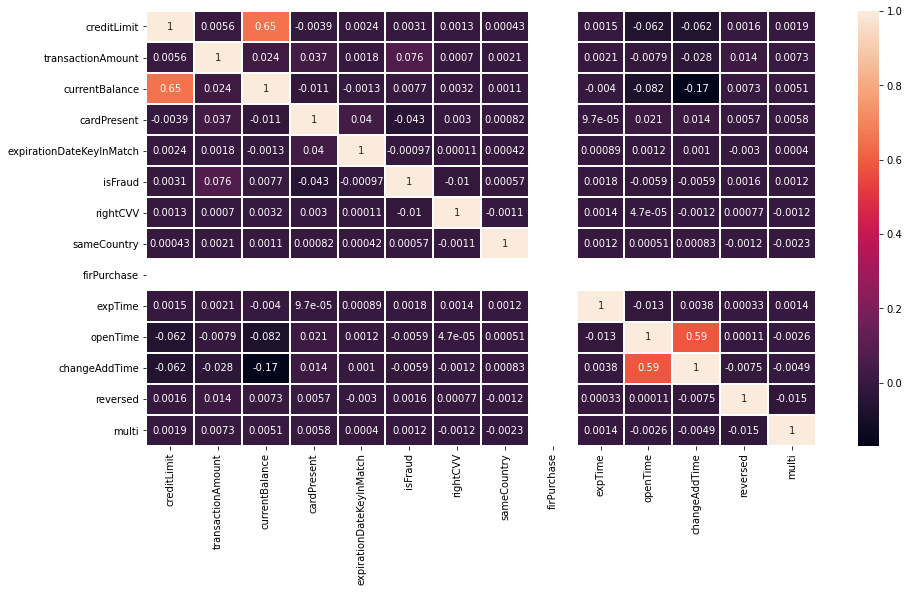

In [ ]:
# heatmap showing the correlation between the features
plt.figure(figsize=(15,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=1, linecolor='white',cmap='rocket')

* We can see that all their correlation is less than 0.7, so I will keep these features right now.


**1.4. Preprocessing**

**Segregating the Dependent and Independent variables**

In [ ]:
features=df.drop(['isFraud'], axis = 1)
X=features.copy()


In [ ]:
features.shape

(786363, 17)

In [ ]:
labels=df[['isFraud']]

In [ ]:
labels.shape

(786363, 1)

In [ ]:
# Convert boolean features into int variables

boo = features.select_dtypes(include=['bool']).columns.to_list()
for column in boo:
    features[column] = features[column].astype(int)
features.reversed = features.reversed.astype(int)
features.multi = features.multi.astype(int)
labels.isFraud=labels.isFraud.astype(int)

**Encoding Categorical data using OneHotEncoding**

In [ ]:
# Encoding the Features 
encoder=ColumnTransformer([('encoder',OneHotEncoder(), [4,5])],remainder='passthrough')
features=encoder.fit_transform(features)

**Removing redundancy columns from the features**

In [ ]:
temp1=features[:, 1:19]

In [ ]:
temp2=features[:,20:]

In [ ]:
#Concatenating temp1 and temp2 
features=np.concatenate((temp1,temp2), axis=1)

In [ ]:
features

array([[0.0, 0.0, 0.0, ..., 820.8309722222223, 0, 0],
       [0.0, 0.0, 0.0, ..., 1035.3097916666666, 0, 0],
       [0.0, 0.0, 0.0, ..., 848.1208449074074, 0, 0],
       ...,
       [0.0, 0.0, 0.0, ..., 442.221875, 0, 0],
       [0.0, 0.0, 0.0, ..., 300.8525, 0, 0],
       [0.0, 0.0, 0.0, ..., 123.5997800925926, 0, 0]], dtype=object)

####**1.5. SMOTE**

* As we can see in our data analysis part, our target variabel isFraud is highly imbalanced, where there're 773946 negative class but only 12417 positive class. So I decide to use SMOTE to over-sample the dataset.
* SMOTE generates the virtual training records by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed

In [ ]:
# Using SMOTE to oversample the dataset
sm = SMOTE(random_state=4)
features_smote, labels_smote = SMOTE().fit_sample(features, labels)

print("Original data distribution: ")
print(labels.isFraud.value_counts())
print("SMOTE data distribution: ")
smote_labels=pd.DataFrame(labels_smote,columns=['isFraud'])
print(smote_labels.value_counts())

Original data distribution: 
0    773946
1     12417
Name: isFraud, dtype: int64
SMOTE data distribution: 
isFraud
1          773946
0          773946
dtype: int64


####**1.6. Model building**

* In the model building part, I use RandomSearchCV and K-Folds CV to optimize my model.

**1.6.1. Decision Tree model**

* The decision true are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model.

* I will try decision tree model first because it's a very interpretable model and it's very transparent. If we are going to show the workflow of our machine learning model to our non-technical clients, decision tree may be a good choice. We can easily visualize our decision tree model.

In [ ]:
def DT_pred(X, y):
    
    # Build models with hyperparameters sets
    RSC = RandomizedSearchCV(
        estimator=DecisionTreeClassifier(),
        param_distributions={
            'criterion': ['gini', 'entropy'],
            'max_depth': range(1, 100, 10),
            'max_features': ['auto', 'sqrt', 'log2']}, 
        cv=3, scoring='roc_auc', n_jobs=-1, verbose = True)
    
    # Fit RandomizedSearchCV to find best hyperparameters
    search_result = RSC.fit(X, y)
    print("Best using: ", search_result.best_params_, "Score: ", search_result.best_score_)

    # Build models with optimized hyperparameters
    model_DT = DecisionTreeClassifier(
        criterion=search_result.best_params_["criterion"],
        max_depth=search_result.best_params_["max_depth"],
        max_features=search_result.best_params_["max_features"])

    # Split dataset into 3 consecutive folds
    kf = KFold(n_splits=3, shuffle=True, random_state=None)
    
    i = 1
    for train, test in kf.split(X):  
        X_train = X[train,:]
        y_train = y[train]
        X_test = X[test,:]
        y_test = y[test]
        model_DT.fit(X_train, y_train)
        train_pred = model_DT.predict(X_train)
        y_pred = model_DT.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, train_pred)
        train_precision = precision_score(y_train, train_pred)
        train_recall = recall_score(y_train, train_pred)
        train_auc = roc_auc_score(y_train, train_pred)
        
        test_accuracy = accuracy_score(y_test, y_pred)
        test_precision = precision_score(y_test, y_pred)
        test_recall = recall_score(y_test, y_pred)
        test_auc = roc_auc_score(y_test, y_pred)        
        
        print('Fold '+ str(i), ':  Training accuracy: ', train_accuracy, 'Testing accuracy: ', test_accuracy)
        print('Fold '+ str(i), ':  Training precision: ', train_precision, 'Testing precision: ', test_precision)
        print('Fold '+ str(i), ':  Training recall: ', train_recall, 'Testing accuracy: ', test_recall)
        print('Fold '+ str(i), ':  Training auc: ', train_auc, 'Testing auc: ', test_auc)
        
        i += 1
        
    return model_DT

In [ ]:
model_DT = DT_pred(features_smote, labels_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


Best using:  {'max_features': 'auto', 'max_depth': 21, 'criterion': 'gini'} Score:  0.9753910950783863
Fold 1 :  Training accuracy:  0.924669162964858 Testing accuracy:  0.91969982401873
Fold 1 :  Training precision:  0.9293979146303003 Testing precision:  0.9240874538875582
Fold 1 :  Training recall:  0.919224502527322 Testing accuracy:  0.9143944419229829
Fold 1 :  Training auc:  0.9246712214615596 Testing auc:  0.9196958168859929
Fold 2 :  Training accuracy:  0.9217251591196285 Testing accuracy:  0.9163042382801901
Fold 2 :  Training precision:  0.9232790075407443 Testing precision:  0.9185921976562591
Fold 2 :  Training recall:  0.91983505202608 Testing accuracy:  0.9136887122453485
Fold 2 :  Training auc:  0.9217245548759793 Testing auc:  0.916305912187635
Fold 3 :  Training accuracy:  0.920994487987534 Testing accuracy:  0.9177985285795133
Fold 3 :  Training precision:  0.9334281860123561 Testing precision:  0.9305487325113728
Fold 3 :  Training recall:  0.9066411595281567 Testin

**1.6.2. KNN model**

In [ ]:
def KNN_pred(X, y):
  model_KNN = KNN(n_neighbors=5)
  # Split dataset into 3 consecutive folds
  kf = KFold(n_splits=3, shuffle=True, random_state=None)
    
  i = 1
  for train, test in kf.split(X):  
      X_train = X[train,:]
      y_train = y[train]
      X_test = X[test,:]
      y_test = y[test]
      model_KNN.fit(X_train, y_train)
      train_pred = model_KNN.predict(X_train)
      y_pred = model_KNN.predict(X_test)
      
      train_accuracy = accuracy_score(y_train, train_pred)
      train_precision = precision_score(y_train, train_pred)
      train_recall = recall_score(y_train, train_pred)
      train_auc = roc_auc_score(y_train, train_pred)
      
      test_accuracy = accuracy_score(y_test, y_pred)
      test_precision = precision_score(y_test, y_pred)
      test_recall = recall_score(y_test, y_pred)
      test_auc = roc_auc_score(y_test, y_pred)        
      
      print('Fold '+ str(i), ':  Training accuracy: ', train_accuracy, 'Testing accuracy: ', test_accuracy)
      print('Fold '+ str(i), ':  Training precision: ', train_precision, 'Testing precision: ', test_precision)
      print('Fold '+ str(i), ':  Training recall: ', train_recall, 'Testing accuracy: ', test_recall)
      print('Fold '+ str(i), ':  Training auc: ', train_auc, 'Testing auc: ', test_auc)
      
      i += 1
      
  return model_KNN


In [ ]:
model_KNN = KNN_pred(features_smote, labels_smote)

Fold 1 :  Training accuracy:  0.9370954175097488 Testing accuracy:  0.9127865509996822
Fold 1 :  Training precision:  0.890616161948138 Testing precision:  0.8561415746389035
Fold 1 :  Training recall:  0.9967534730288529 Testing accuracy:  0.9918335314731501
Fold 1 :  Training auc:  0.937027352763534 Testing auc:  0.9129663074467502
Fold 2 :  Training accuracy:  0.9371467776821639 Testing accuracy:  0.9134183780263739
Fold 2 :  Training precision:  0.8905750757225463 Testing precision:  0.8570797348865234
Fold 2 :  Training recall:  0.9967553423462713 Testing accuracy:  0.9923378329670841
Fold 2 :  Training auc:  0.9371512829544625 Testing auc:  0.9134064457051143
Fold 3 :  Training accuracy:  0.9370014187036305 Testing accuracy:  0.9128776426262297
Fold 3 :  Training precision:  0.8902279481203593 Testing precision:  0.8568559503560557
Fold 3 :  Training recall:  0.9967792943550343 Testing accuracy:  0.9918152948775969
Fold 3 :  Training auc:  0.9370649564146515 Testing auc:  0.91270

In [ ]:
# Save my models as pickle files
file='fraudulent.pkl'
pickle.dump(model_DT,open(file,'wb'))

####**2. Provide an estimate of performance using an appropriate sample.**

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features_smote, labels_smote, random_state=2, test_size=0.30)

In [ ]:
def plot_performance(y_test, y_pred, y_pred_prob):


    test_fpr, test_tpr, _ = roc_curve(y_test, y_pred_prob)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    
    # ROC Curve
    fig = plt.figure(1, figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.plot(test_fpr, test_tpr, label="ROC (area = %0.4f)" % roc_auc_score(y_test, y_pred), color="blue", lw=2)
    plt.plot([0, 1], [0, 1], "k--")
    plt.legend(loc="lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    
    
    # Precision Recall Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, marker='.', color="blue", lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title("Precision Recall Curve")
    
    
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_confusion(y_test, y_pred):   
    
    cm = confusion_matrix(y_test, y_pred)
    
    # Confusion Matrix
    plt.figure(figsize=(10,10))
    ax =  fig.add_subplot(1,1,1, adjustable='box', aspect=1)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    np.set_printoptions(precision=2)
    plt.show()

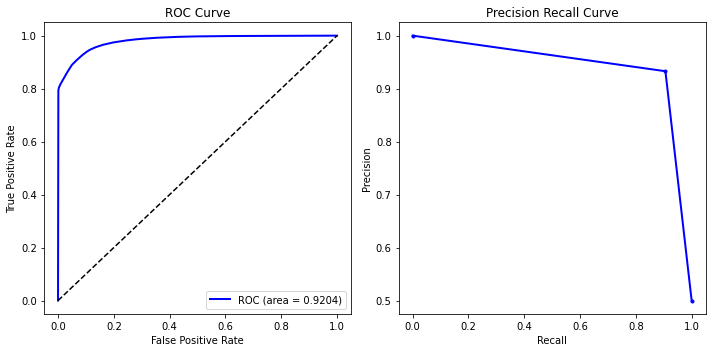

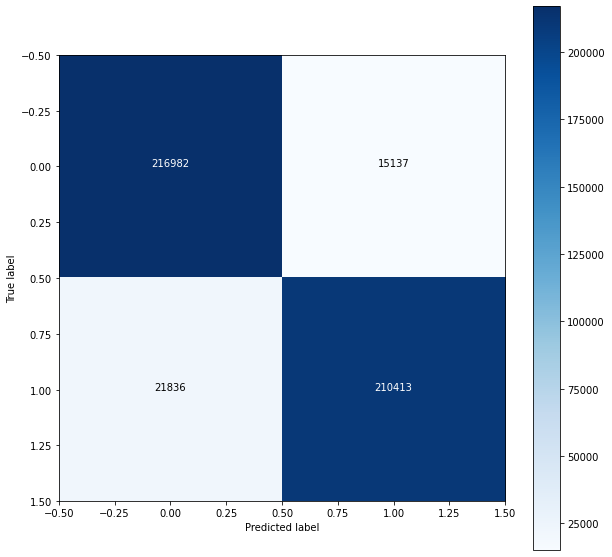

In [ ]:
# Decision Tree performance

y_pred = model_DT.predict(features_test)
y_pred_prob = model_DT.predict_proba(features_test)
y_pred_prob = y_pred_prob[:, 1]

plot_performance(labels_test, y_pred, y_pred_prob)
plot_confusion(labels_test, y_pred)

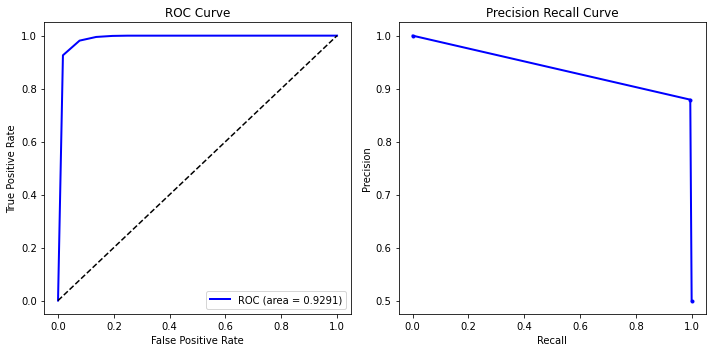

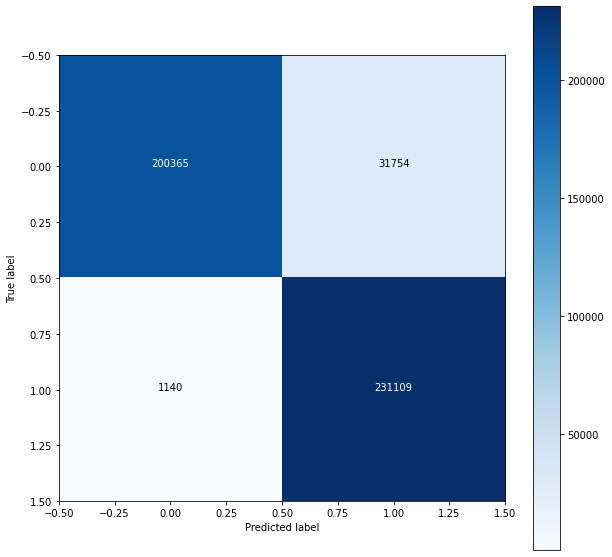

In [ ]:
# KNN performance
y_pred = model_KNN.predict(features_test)
y_pred_prob = model_KNN.predict_proba(features_test)
y_pred_prob = y_pred_prob[:, 1]

plot_performance(labels_test, y_pred, y_pred_prob)
plot_confusion(labels_test, y_pred)

I made 2 plots to evaluate each of these three model, ROC Curve, Precision-recall Curve and Confusion Matrix.

####**3. Explain your methodology (modeling algorithm/method used and why, what features/data you found useful, what questions you have, and what you would do next with more time)** 

**Methodology**

* SMOTE: In the original dataset, the class within our target variable “isFraud” is quite imbalanced. Fraud cases are much less than normal cases. So I will use SMOTE function to oversample my dataset. SMOTE generates the virtual training records by randomly selecting one or more of the k-nearest neighbors for each example in the minority class. After the oversampling process, the data is reconstructed and the performance of our classification models can be better.
* Cross validation: cross validation is an algorithm that can ensure that each and every instance of the dataset will be trained and tested. The K-Fold Cross Validation works by first dividing the dataset into k-subsets. I divided the dataset into (k=3) parts. We reserve 1 part for testing and train the algorithm over the 2 parts. We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged of the algorithm. With cross-validation, we can achieve a generalized model.
* RandomizedSearchCV: Random Search is a hyperparameter tuning algorithm. It helps us select models by setting up a grid of hyperparameter values and selecting random combinations to train the model and score. This allows us to explicitly control the number of parameter combinations that are attempted. It’s more efficient than GridSearchCV and its chance of finding the optimal parameter are comparatively.
* Decision Tree: Decision tree is a non-parametric supervised learning method. The rule for decision tree algorithm are generally in form of if-then-else statements. The deeper the tree, the more complex the rules and fitter the model. The reason why I use decision trees is that it's a very interpretable model and it's very transparent. If we are going to show the workflow of our machine learning model to our non-technical clients, decision tree may be a very good choice. We can easily visualize our decision tree model.

#**Thanks**